In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#데이터 수집
ticker = "AAPL" #애플주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']] #종가

data.head() # 확인

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

data.head()

def create_dataset(dataset, lookback):
       X, y = [], []
       for i in range(len(dataset - lookback)):
           X.append(dataset[i:i + lookback, 0])
           y.append(dataset[i:i + lookback, 0])
       return np.array(X), np.array(y)
   
look_back = 60
X, y = create_dataset(scaled_data, look_back)
X = np.shape(X, (X.shape[0], X.shape[1], 1))

# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),  # input_shape(시퀀스 길이, 피처수)
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# 5. 예측(복원) 및 시각화 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 2차원 배열로 표시 (샘플수, 1)

# 실제 값 복원 (시각화 시)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288580
2015-01-05,23.604330
2015-01-06,23.606556
2015-01-07,23.937571
2015-01-08,24.857306


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\Project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 9.3308e-04 - val_loss: 0.0021
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0104 - val_loss: 0.0055
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0126 - val_loss: 4.7860e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.1061e-04 - val_loss: 4.0915e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.0396e-04 - val_loss: 6.4419e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 7.5749e-05 - val_loss: 3.8394e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.5645e-05 - val_loss: 3.6193e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.3962e-05 - val_loss: 3.4464e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.8848e-05 - val_loss: 3.3194e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.2316e-04 - val_loss: 3.3016e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.7163e-04 - val_loss: 3.4573e-04
Ep

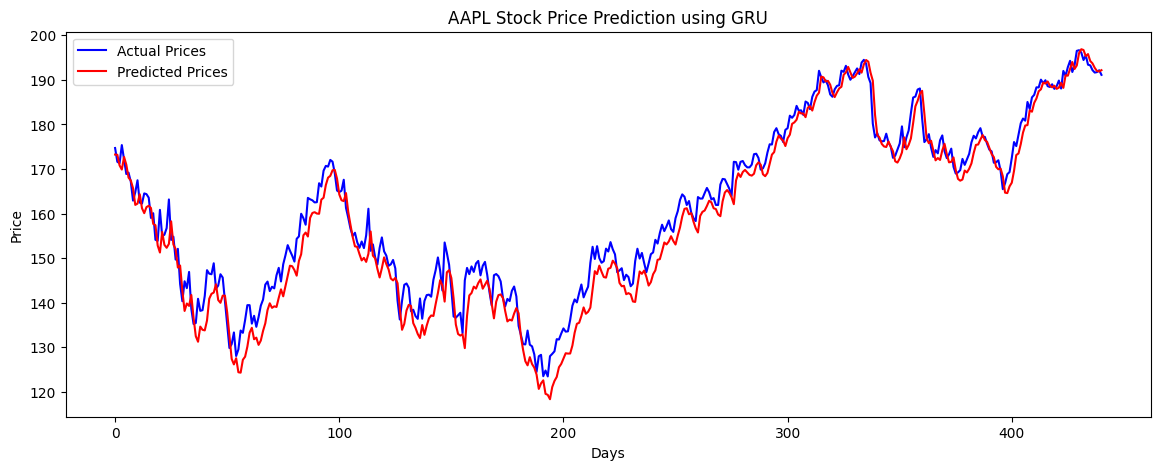

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

#데이터 수집
ticker = "AAPL" #애플주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']] #종가

data.head() # 확인

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# GRU 모델에 적합한 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # GRU 입력 형태

# 3. "GRU" 모델 구성
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    GRU(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. 모델 학습
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 정규화 복원

# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

         date  count
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121


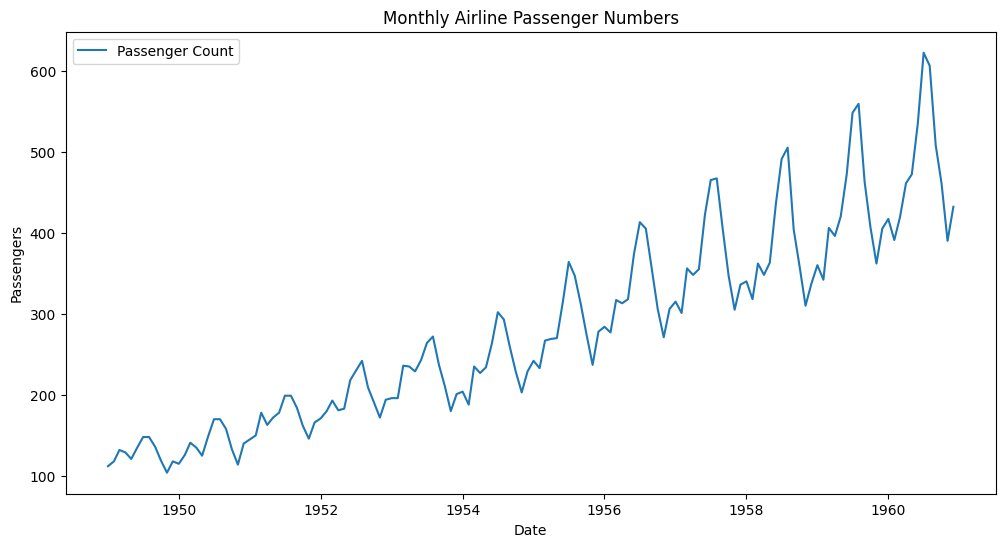

Epoch 1/50


c:\Project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0482 - val_loss: 0.1583
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0070 - val_loss: 0.0245
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0194 - val_loss: 0.0257
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0190 - val_loss: 0.0333
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0094 - val_loss: 0.0583
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0076 - val_loss: 0.0532
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0061 - val_loss: 0.0336
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0063 - val_loss: 0.0247
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - val_loss: 0.0243
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0068 - val_loss: 0.0269
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0054 - val_loss: 0.0296
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0049 - val_loss: 0.0274
Epoch 13/50

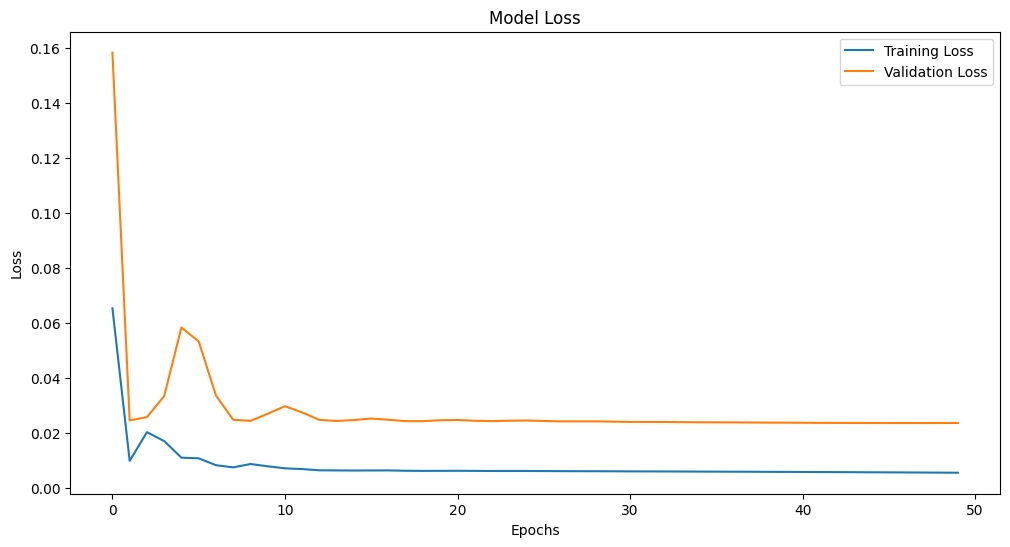

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


ValueError: x and y must have same first dimension, but have shapes (29,) and (17, 1, 1)

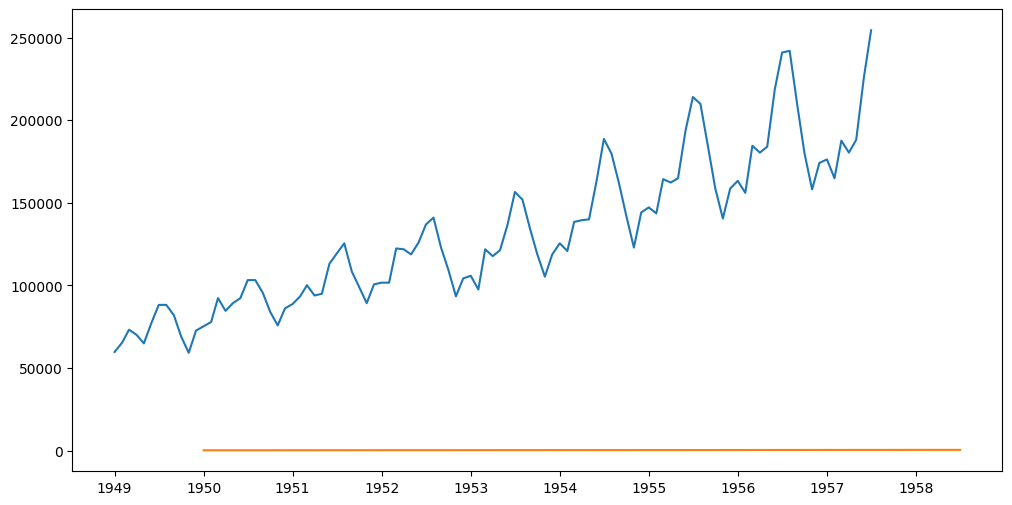

In [16]:
# 항공기 탑승객 수요 예측 (LSTM)
# 기존의 데이터를 바탕으로 새로운 데이터를 예측해야할때
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 불러오기
data_path = 'dataset/airline.csv'  # 데이터 경로
df = pd.read_csv(data_path)

# 데이터 확인
print(df.head())

# "데이터 확인 절차"
# " 열이 문자열인경우 "
# 날짜(Date)와 탑승객 수(count) 열의 이름 설정 및 변환
df['date'] = pd.to_datetime(df['date'])
                     #위의 변경된 설정으로
df.set_index('date', inplace=True)

# 데이터 시각화
plt.figure(figsize=(12, 6))
#
plt.plot(df['count'], label='Passenger Count')
#
plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# " 값을 0과 1로 맞춰야할때 "
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['count']])

# 데이터셋 분리 (학습 데이터와 테스트 데이터)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 시계열 데이터 생성*
def create_dataset(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep ):
        X.append(data[i:i+timestep])
        y.append(data[i+timestep])
    return np.array(X), np.array(y)

timestep = 12
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

# LSTM 입력에 맞게 데이터 "형태 변경" (reshape)
                                  #shape의 첫째값 = sample, 두번째값 = timesteps
                                   #(samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
# y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)

# LSTM 모델 생성
model = Sequential([ 
              # 그 다음 값으로 넘겨주기  # 모델이 입력 데이터를 어떤 모양으로 받아들일지를 명시
    LSTM(50, return_sequences=True, input_shape=(timestep, 1)),
    LSTM(50, return_sequences=False),
    # 완전 연결 층
    Dense(25), 
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1, shuffle=False)

print(X.shape)
print(y.shape)

# 학습 과정 시각화 (loss 율) # 필수 그래프
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트 데이터 "예측"
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 값 "역정규화" (필수)
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)) 
test_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)) 

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(y_train)], y_train, label='Actual Train Data')
plt.plot(df.index[timestep:len(train_predict) + timestep], train_predict, label='Train Prediction')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], y_test, label='Actual Test Data')
plt.plot(df.index[len(train_data):len(train_data) + len(test_predict)], test_predict, label='Test Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [12]:
# 자전거 대여량 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

#태뷸러 데이터
dataset_path = './dataset/'
train_data = pd.read_csv(dataset_path + 'train.csv')
test_data = pd.read_csv(dataset_path + 'test.csv')

# 데이터 전처리
def preprocess_data(data):
    data['datetime'] = pd.to_datetime(data['daytime'])
    data['hour'] = data['datetime'].dt.hour
    data['day'] = data['datetime'].dt.day
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year
    
    data = data.drop(['datetime', 'casual', 'registered'], axis=1, errors='ignore')
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

#Feature와 Target 분리
X = train_data.drop(['count'], axis=1).values
y = train_data['count'].values.reshape(-1,1)

# MinMaxScaler를 사용하여 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Train/Test 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 차원조정(GRU입력 형태)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_train.shape[0], X_train.shape[1], 1))

# 4. GRU 모델 생성
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 5. 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    shuffle=False
)

# 6. 학습 과정 시각화 (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# 7. 테스트 데이터 예측
X_test = scaler_X.transform(test_data.values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

# 결과 저장 (CSV)
test_data['predicted_count'] = y_pred
test_data.to_csv(dataset_path + 'test_predictions.csv', index=False)
print("예측 결과가 'test_predictions.csv'로 저장되었습니다.")

FileNotFoundError: [Errno 2] No such file or directory: './dataset/train.csv'

In [16]:
# 사전 라이브러리 설치(XAI용, XAI: 설명가능한 AI) : pip install shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer    # 결측치를 처리하는데 사용
from sklearn.preprocessing import LabelEncoder    #범주형 데이터를 숫자형 데이터로 변환하는 데 사용
import shap  # feature importance와 유사 (LSTM에 사용)

# 1. 데이터 로드 및 전처리
train_df = pd.read_csv("../dataset/train_titanic.csv")
test_df = pd.read_csv("../dataset/test_titanic.csv")

# 데이터 확인
train_df.head()


# 결측치 확인
print("Train 데이터 결측치 확인:")
print(train_df.isnull().sum())
print("\nTest 데이터 결측치 확인:")
print(test_df.isnull().sum())

# cleaned = train_df.dropna()
# cleaned = test_df.dropna()

# 불필요한 컬럼 제거 (원핫 인코딩 없이도 잘 작동하도록) _ drop
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Label Encoding (Sex 컬럼)
# 원 핫 인코딩보다 심플한 방식 :  문자열을 숫자로 변경
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])  # train 데이터 기준으로 transform
train_df.head()

# Embarked 컬럼 처리 (최빈값으로 채우기)
# mode함수 : 최빈값
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Label Encoding (Embarked 컬럼)
le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked']) # train 데이터 기준으로 transform

# Age 컬럼 결측치 처리 (평균으로 채우기)
# SimpleImputer() : ()로 값 채우기
imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

# Fare 컬럼 결측치 처리 (평균으로 채우기)
# 비어있는 값을 평균값으로 채움
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean()) # test 데이터에만 Fare 결측치 존재

# *전처리 후 데이터 확인
print("전처리 후 데이터 형태:")
print("Train 데이터:", train_df.shape)
print("Test 데이터:", test_df.shape)

# *데이터 컬럼 확인
print("\nTrain 데이터 컬럼:", train_df.columns.tolist())
print("Test 데이터 컬럼:", test_df.columns.tolist())

# X, Y 구분
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# *피처 수 확인
n_features = X.shape[1]
print(f"피처 수: {n_features}")

# 스케일링
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test_df = scaler.transform(test_df)

# 특성 이름 저장
feture_names = train_df.drop('Survived', axis=1).columns.tolist()

# train, validation set 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 확인
print(f"X_train 형태(reshape 전): {X_train.shape}")
print(f"X_val 형태(reshape 전): {X_val.shape}")
print(f"test_data 형태(reshape 전): {test_df.shape}")

# LSTM reshape #(samples, timesteps, features)
               # 데이터개수,   길이       ,  변수
X_train = X_train.reshape(X_train.shape[0], 1, n_features)
X_val = X_val.reshape(X_val.shape[0], 1, n_features)
test_data = test_df.reshape(test_df.shape[0], 1, n_features)

# reshape 후 형태 확인
print(f"X_train 형태(reshape 후): {X_train.shape}")
print(f"X_val 형태(reshape 후): {X_val.shape}")
print(f"test_data 형태(reshape 후): {test_df.shape}")

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(64, input_shape=(1, n_features), return_sequences=True))   
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # 생존여부에 대한 이진 분류(1, 0)이므로 sigmoid 사용    
 
                                  # sigmoid 함수 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy : 이진 분류에 사용 (ex. 0, 1 등)

# Early Stopping - verbose=1로 설정하여 진행상황 확인
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,          # 10번의 에폭 동안 개선이 없으면 학습 중단
    restore_best_weights=True,    #  가장 좋은 성능을 보였던 모델의 가중치(weights)를 복원
    verbose=1             # 중단 시 메시지 출력
)

# 3. 모델 훈련 
epochs = 100
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1             # 훈련 진행상황 출력
)

# 학습이 몇 번째 에폭에서 멈췄는지 확인
actual_epochs = len(history.history['loss'])
print(f"학습이 {actual_epochs}번째 에폭에서 완료되었습니다.")

# 4. 예측 및 평가
y_pred_val_proba = model.predict(X_val, verbose=0)

# 테스트 데이터 예측
y_pred_proba = model.predict(test_data, verbose=0)

# Validation set 평가 (수동)
y_pred_val = (y_pred_val_proba > 0.5).astype(int)    # 0.5를 기준으로 분류, astype(int) : True는 1로, False는 0

# 테스트 데이터 평가
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion Matrix (Validation set)
cm = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation Set):", cm)

# Classification Report (Validation set)
print("Classification Report (Validation Set):", classification_report(y_val, y_pred_val))


Train 데이터 결측치 확인:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

Test 데이터 결측치 확인:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
전처리 후 데이터 형태:
Train 데이터: (891, 8)
Test 데이터: (418, 7)

Train 데이터 컬럼: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Test 데이터 컬럼: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
피처 수: 7
X_train 형태(reshape 전): (712, 7)
X_val 형태(reshape 전): (179, 7)
test_data 형태(reshape 전): (418, 7)
X_train 형태(reshape 후): (712, 1, 7)
X_val 형태(reshape 후): (179, 1, 7)
test_data 형태(reshape 후): (418, 7)
Epoch 1/100


c:\Project\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5367 - loss: 0.6895 - val_accuracy: 0.5866 - val_loss: 0.6748
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6208 - loss: 0.6641 - val_accuracy: 0.5866 - val_loss: 0.6461
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6156 - loss: 0.6313 - val_accuracy: 0.5866 - val_loss: 0.6168
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6103 - loss: 0.6068 - val_accuracy: 0.5866 - val_loss: 0.5947
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6312 - loss: 0.5744 - val_accuracy: 0.6313 - val_loss: 0.5710
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6711 - loss: 0.5617 - val_accuracy: 0.7207 - val_loss: 0.5499
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7290 - loss: 0.5371 - val_accuracy: 0.7598 - val_loss: 0.5290
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7873 - loss: 0.5196 - val_accuracy: 0.7263 - val_loss: 0.